# Verlet Integration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nam import solve, runge_kutta_constructor

### Warmup

Simulate 2-body motion with `nam`.

In [2]:
# using only two state vectors, q and p.

def q_dot(t, state):
    return state[1]

def p_dot(t, state):
    q = state[0]
    qa, qb = q[:2], q[2:]
    r = qa - qb
    r_norm = np.sqrt(r.dot(r))
    pa_ = -2/np.power(r_norm, 3/2)*r
    return np.array([pa_, -pa_]).flatten()

In [42]:
ff = [q_dot, p_dot]
constructor = runge_kutta_constructor(ff)
initial_condition = [
    np.array([1, 0, -1, 0]), # initial q value.
    np.array([0, 1, 0, -1]), # initial p value
]

tt = np.linspace(0, 10, 1000)

In [43]:
solution = solve(constructor, initial_condition, tt)

In [44]:
# extract data
qq = [s[0] for s in solution]
xxa = [q[0] for q in qq]
yya = [q[1] for q in qq]
xxb = [q[2] for q in qq]
yyb = [q[3] for q in qq]

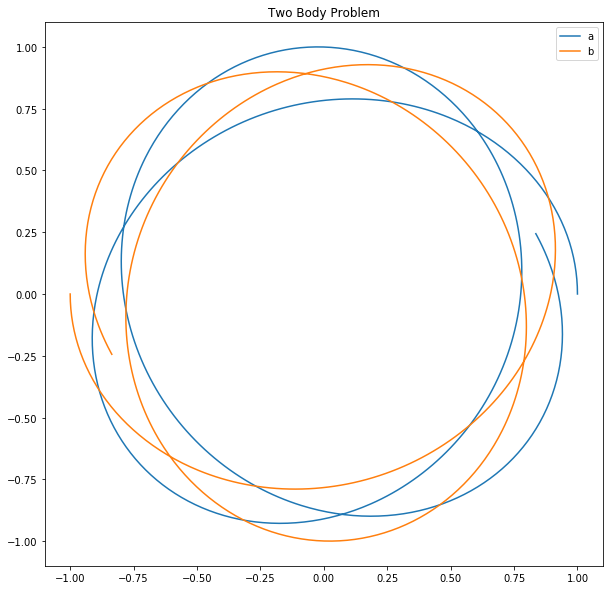

In [45]:
plt.figure(figsize = (10, 10))
plt.plot(xxa, yya, label = 'a')
plt.plot(xxb, yyb, label = 'b')
plt.title('Two Body Problem')
plt.legend()
plt.show()

## Verlet

In [ ]:
def verlet_constructor(ff):
    # vectorize function.
    